In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from google.colab import files
uploaded = files.upload()

file = list(uploaded.keys())[0]
df = pd.read_csv(file, encoding='ISO-8859-1')

In [ ]:
df.shape

(1436, 38)

In [ ]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90.0,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90.0,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
df.tail()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86.0,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86.0,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86.0,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86.0,1,...,0,0,0,0,0,0,1,0,0,0
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110.0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
print(df.head())
print(df.info())

# Handle missing values (if any)
df = df.fillna(0)

features = ["Doors", "Cylinders", "Gears", "Weight", "Mfg_Month", "Mfg_Year", "HP", "Met_Color",
 "Automatic", "cc", "Quarterly_Tax", "Mfr_Guarantee", "BOVAG_Guarantee", "Guarantee_Period",
 "ABS", "Airbag_1", "Airbag_2", "Airco", "Automatic_airco", "Boardcomputer", "CD_Player",
 "Central_Lock", "Powered_Windows", "Power_Steering", "Radio", "Mistlamps", "Sport_Model",
 "Backseat_Divider", "Metallic_Rim", "Radio_cassette", "Tow_Bar"]

target = "Price"

In [ ]:


# Encode categorical variables
df["KM"] = LabelEncoder().fit_transform(df["KM"])




In [ ]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
import statsmodels.formula.api as smf
#linear regression fitting

ml_v = smf.ols('Age_08_04 ~ KM + HP + Weight + Gears + Price', data=df).fit()

# t and p-values
print(ml_v.params, '\n', ml_v.pvalues)



Intercept    55.594503
KM            0.002934
HP            0.158471
Weight        0.020004
Gears         2.263072
Price        -0.004692
dtype: float64 
 Intercept     2.282467e-11
KM            5.905128e-04
HP            5.120380e-23
Weight        5.494127e-04
Gears         6.626208e-02
Price        1.106020e-270
dtype: float64


In [ ]:
#
ml_wv = smf.ols('KM~HP+Weight',data = df).fit()
print(ml_wv.params,'\n',ml_wv.pvalues)

Intercept    1742.173831
HP             -6.073770
Weight         -0.477168
dtype: float64 
 Intercept    1.032325e-18
HP           2.744314e-23
Weight       6.842225e-03
dtype: float64


In [ ]:
print(ml_v.rsquared, '\n' ,ml_v.rsquared_adj)

0.78917194104491 
 0.7884347799996124


In [ ]:
print(ml_wv.rsquared,'\n' ,ml_wv.rsquared_adj)

0.07380077830696463 
 0.07250810667864227


In [ ]:
import statsmodels.formula.api as smf
rsq_hp = smf.ols('KM ~HP + Weight + Gears', data=df).fit().rsquared
vif_hp = 1 / (1 - rsq_hp)  # 16.33

rsq_wt = smf.ols('Age_08_04 ~ HP + Doors + Cylinders', data=df).fit().rsquared
vif_wt = 1 / (1 - rsq_wt)  # 564.98

rsq_vol = smf.ols('Weight ~ KM + Weight + HP', data=df).fit().rsquared
vif_vol = 1 / (1 - rsq_vol)  # 564.84

rsq_sp = smf.ols('KM ~ HP + Weight + Gears', data=df).fit().rsquared
vif_sp = 1 / (1 - rsq_sp)  # 16.35

# Storing VIF values in a DataFrame
vif_data = pd.DataFrame({
    "Variables": ["HP", "KM", "Weight", "Age_08_04"],
    "VIF": [vif_hp, vif_wt, vif_vol, vif_sp]
})

# Display the VIF DataFrame
vif_data

<ipython-input-20-382b8c8f8068>:9: RuntimeWarning: divide by zero encountered in scalar divide
  vif_vol = 1 / (1 - rsq_vol)  # 564.84


,Variables,VIF
0,HP,1.087130
1,KM,1.039528
2,Weight,inf
3,Age_08_04,1.087130


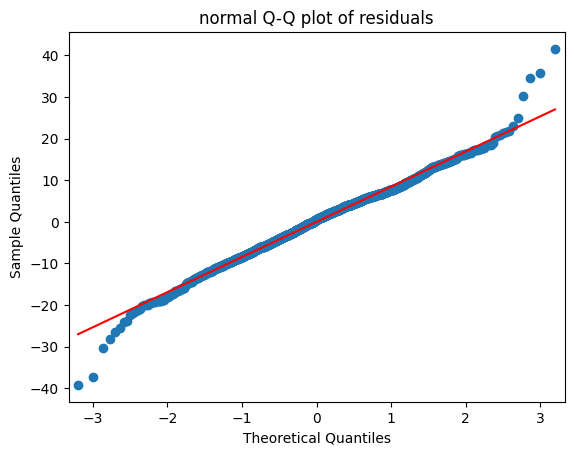

In [ ]:
import statsmodels.api as sm
qqplots = sm.qqplot(ml_v.resid, line='q')
plt.title("normal Q-Q plot of residuals")
plt.show()


In [ ]:

list(np.where(ml_v.resid>10))


[array([   7,   14,   16,   38,   52,   62,   68,   74,   76,   89,   91,
         109,  110,  111,  112,  113,  115,  119,  125,  141,  147,  171,
         523,  529,  557,  696,  710,  773,  796,  836,  840,  847,  891,
         913,  946,  971,  988, 1025, 1028, 1030, 1034, 1035, 1042, 1054,
        1058, 1059, 1079, 1081, 1082, 1085, 1090, 1109, 1118, 1123, 1131,
        1142, 1150, 1152, 1159, 1162, 1163, 1175, 1176, 1179, 1182, 1183,
        1184, 1189, 1191, 1195, 1196, 1211, 1214, 1215, 1217, 1230, 1240,
        1250, 1256, 1258, 1261, 1263, 1265, 1274, 1277, 1280, 1292, 1299,
        1303, 1305, 1307, 1309, 1310, 1311, 1312, 1317, 1320, 1322, 1323,
        1327, 1329, 1330, 1333, 1335, 1336, 1339, 1340, 1343, 1348, 1353,
        1354, 1359, 1360, 1366, 1367, 1369, 1370, 1371, 1375, 1378, 1380,
        1381, 1383, 1384, 1385, 1391, 1392, 1395, 1396, 1398, 1399, 1402,
        1404, 1405, 1408, 1410, 1416, 1417, 1421, 1423, 1425, 1426, 1427,
        1428, 1429, 1430, 1432])]

In [ ]:
def get_standardized_values(vals):
    return (vals - vals.mean()) / vals.std()

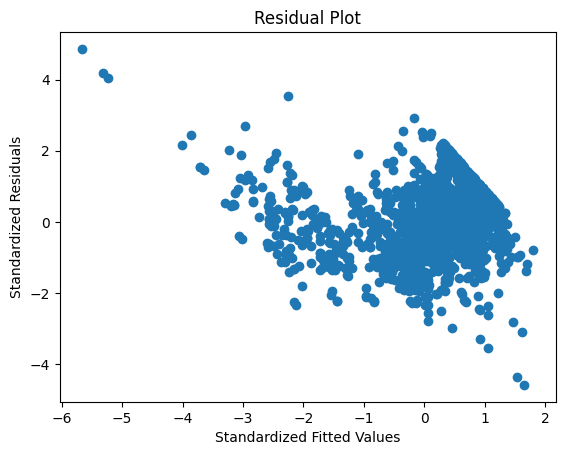

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(get_standardized_values(ml_v.fittedvalues),
            get_standardized_values(ml_v.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show()


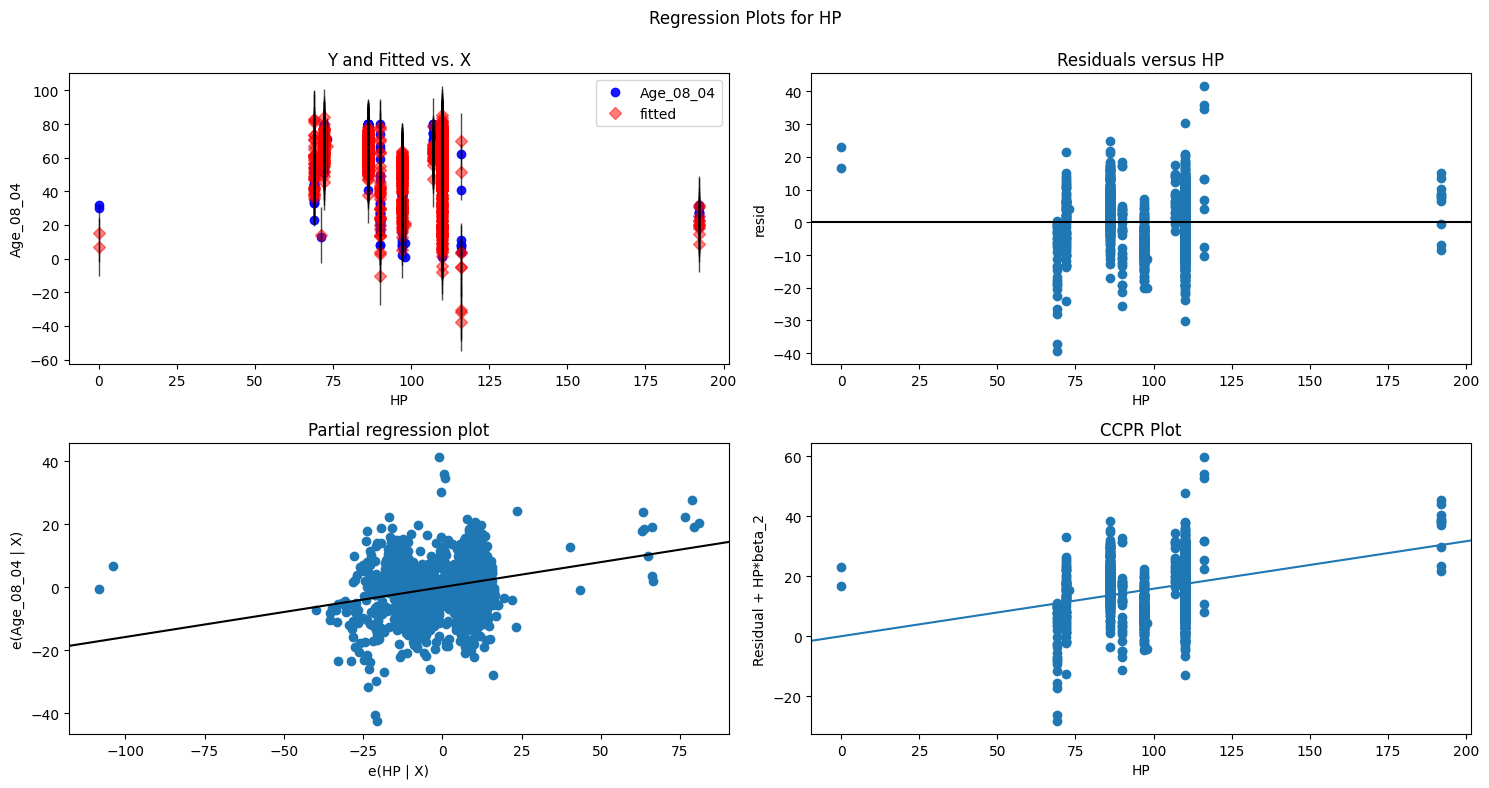

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(ml_v, 'HP', fig=fig)
plt.show()

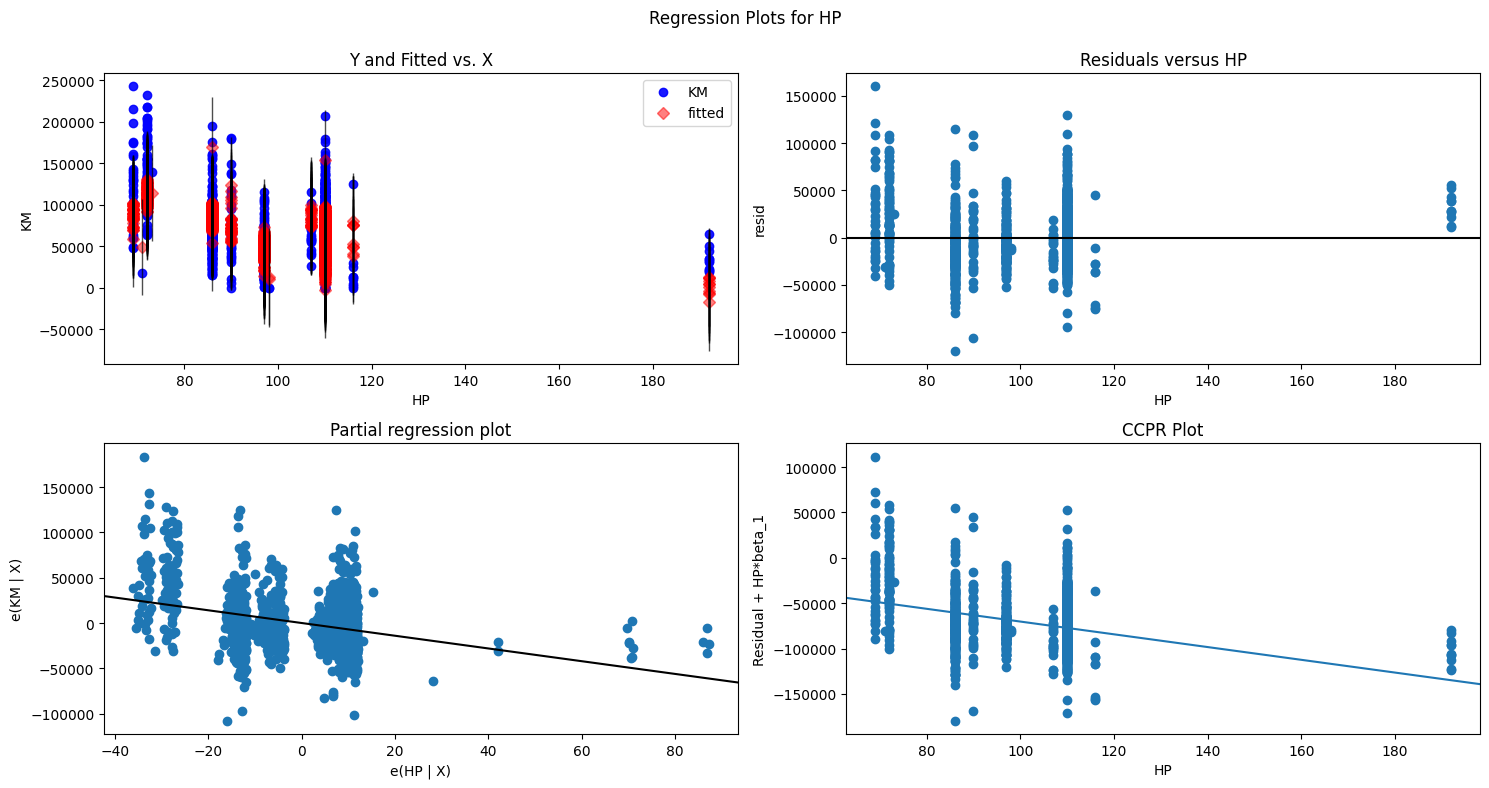

In [ ]:
ml_model = smf.ols('KM ~ HP + Weight + Age_08_04 + Gears', data=df).fit()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(ml_model, 'HP', fig=fig)
plt.show()

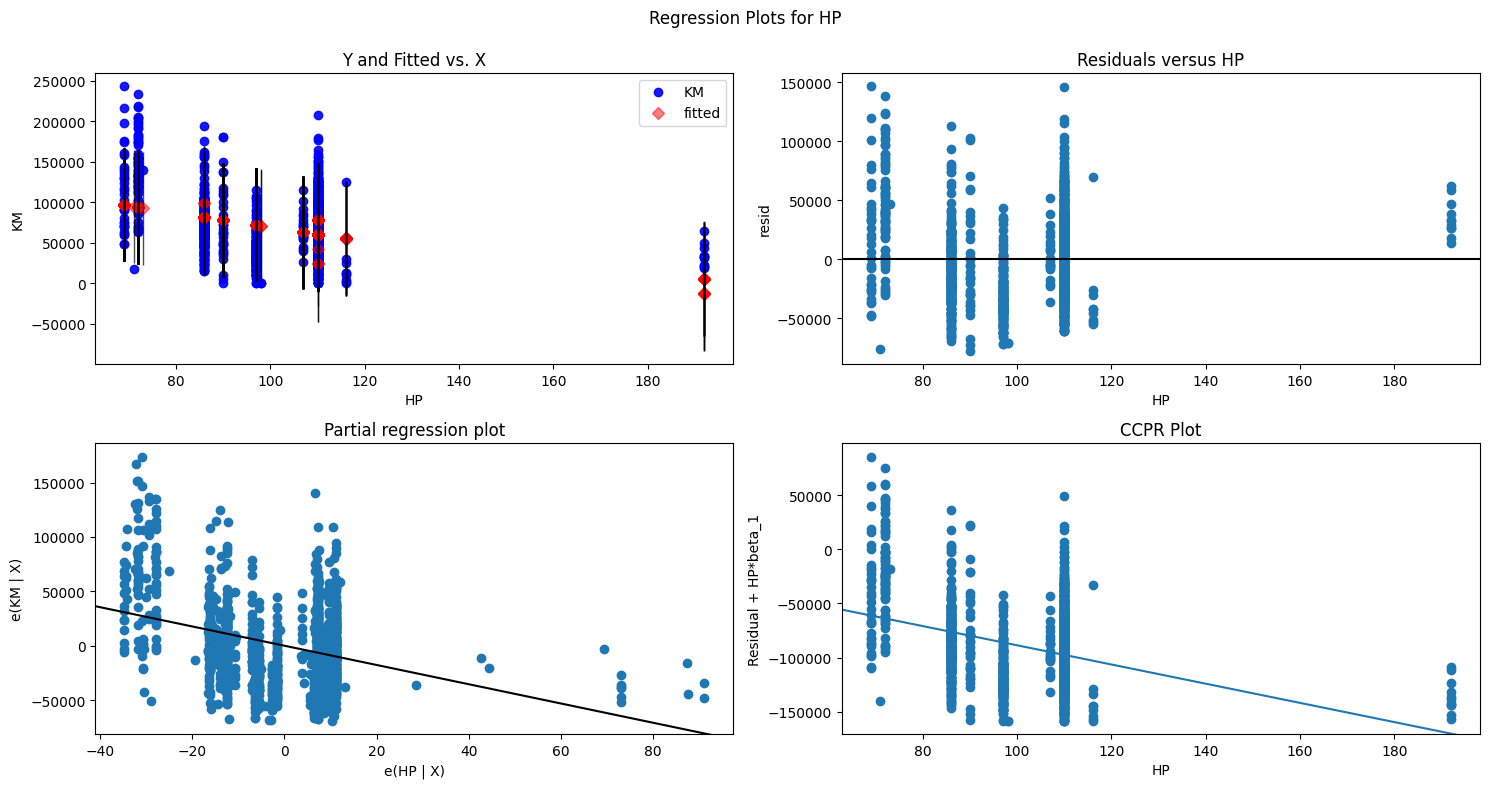

In [ ]:
ml_model = smf.ols('KM ~ HP + Weight + Doors + Gears', data=df).fit()

# Now plot regression diagnostics for HP
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(ml_model, 'HP', fig=fig)
plt.show()


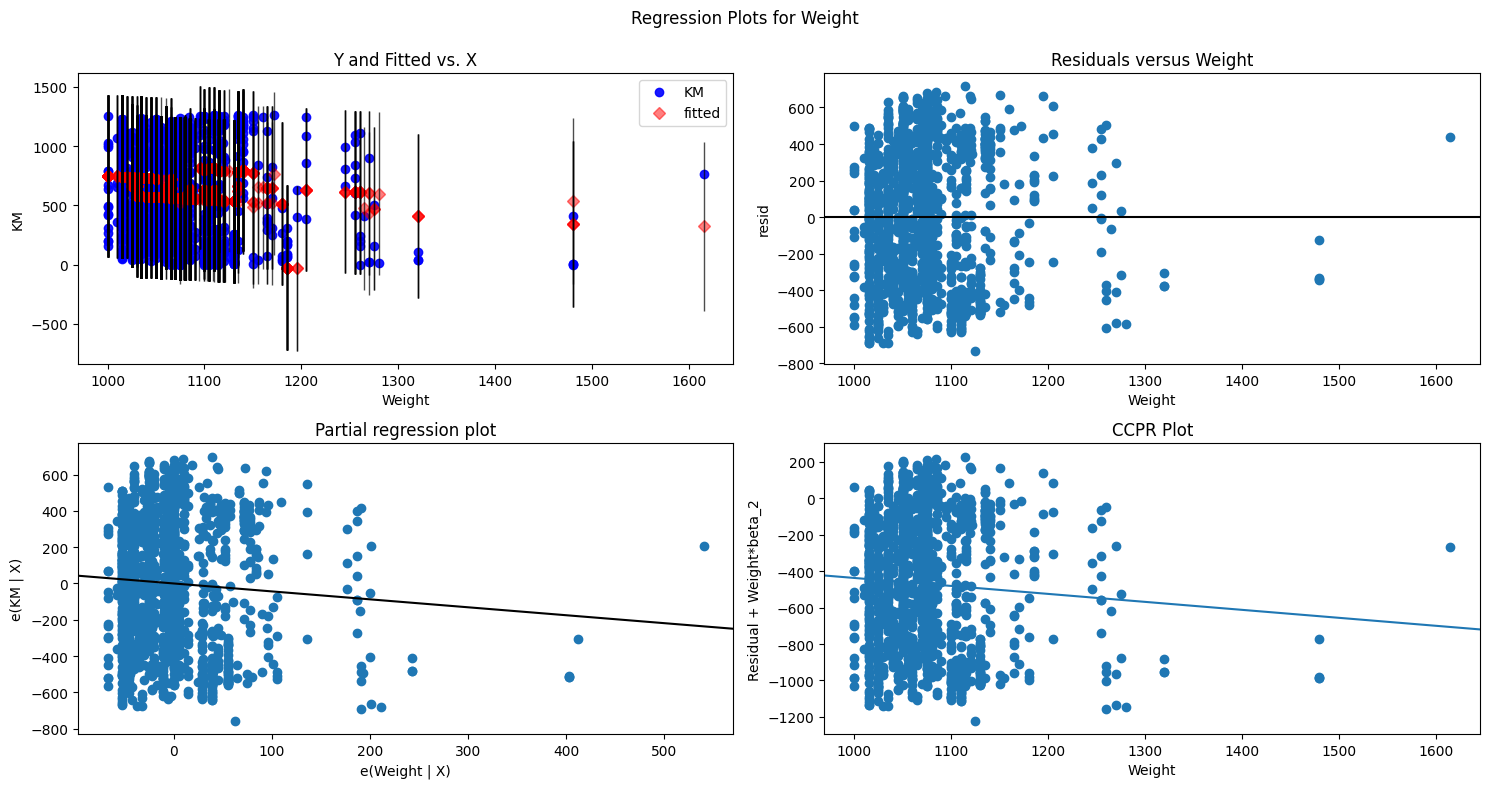

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(ml_wv, 'Weight', fig=fig)
plt.show()